## Exploratory Data Analysis

##### 1. Distribution of Responses related to ***renewable energy*** and ***community-based*** initiatives to see the overall sentiment and levels of participation.
##### 2. **Demographic Analysis** to explore how demographics (e.g., age, gender, location) relate to attitudes towards renewable energy and community projects.
##### 3. **Urbanization Level Analysis** to examine differences in attitudes between urban, regional, and rural respondents.
##### 4. **Correlation Analysis** between different survey responses to identify potential predictors of interest or participation in community energy projects.

In [1]:
import pandas as pd
data = pd.read_csv('../data/SurveyData.csv', index_col=0)
df = pd.DataFrame(data)

In [2]:
age_group_labels = {
    0: "Not Specified",
    1: "18-24",
    2: "25-34",
    3: "35-44",
    4: "45-54",
    5: "55-64",
    6: "65-74",
    7: "75 or older"
}

df['age_group'] = df['q_126'].map(age_group_labels)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculating the proportion of support for q_003 to q_009
support_summary = df[[f'q_00{i}' for i in range(3, 10)]].mean()

# Comparative analysis by gender, location, and urbanization level
# Calculating the mean (proportion of 1's) grouped by these categories
support_by_age = df.groupby('age_group')[[f'q_00{i}' for i in range(3, 10)]].mean()
support_by_location = df.groupby('q_130')[[f'q_00{i}' for i in range(3, 10)]].mean()
support_by_urbanisation = df.groupby('q_123')[[f'q_00{i}' for i in range(3, 10)]].mean()

#support_summary, support_by_age, support_by_location, support_by_urbanisation



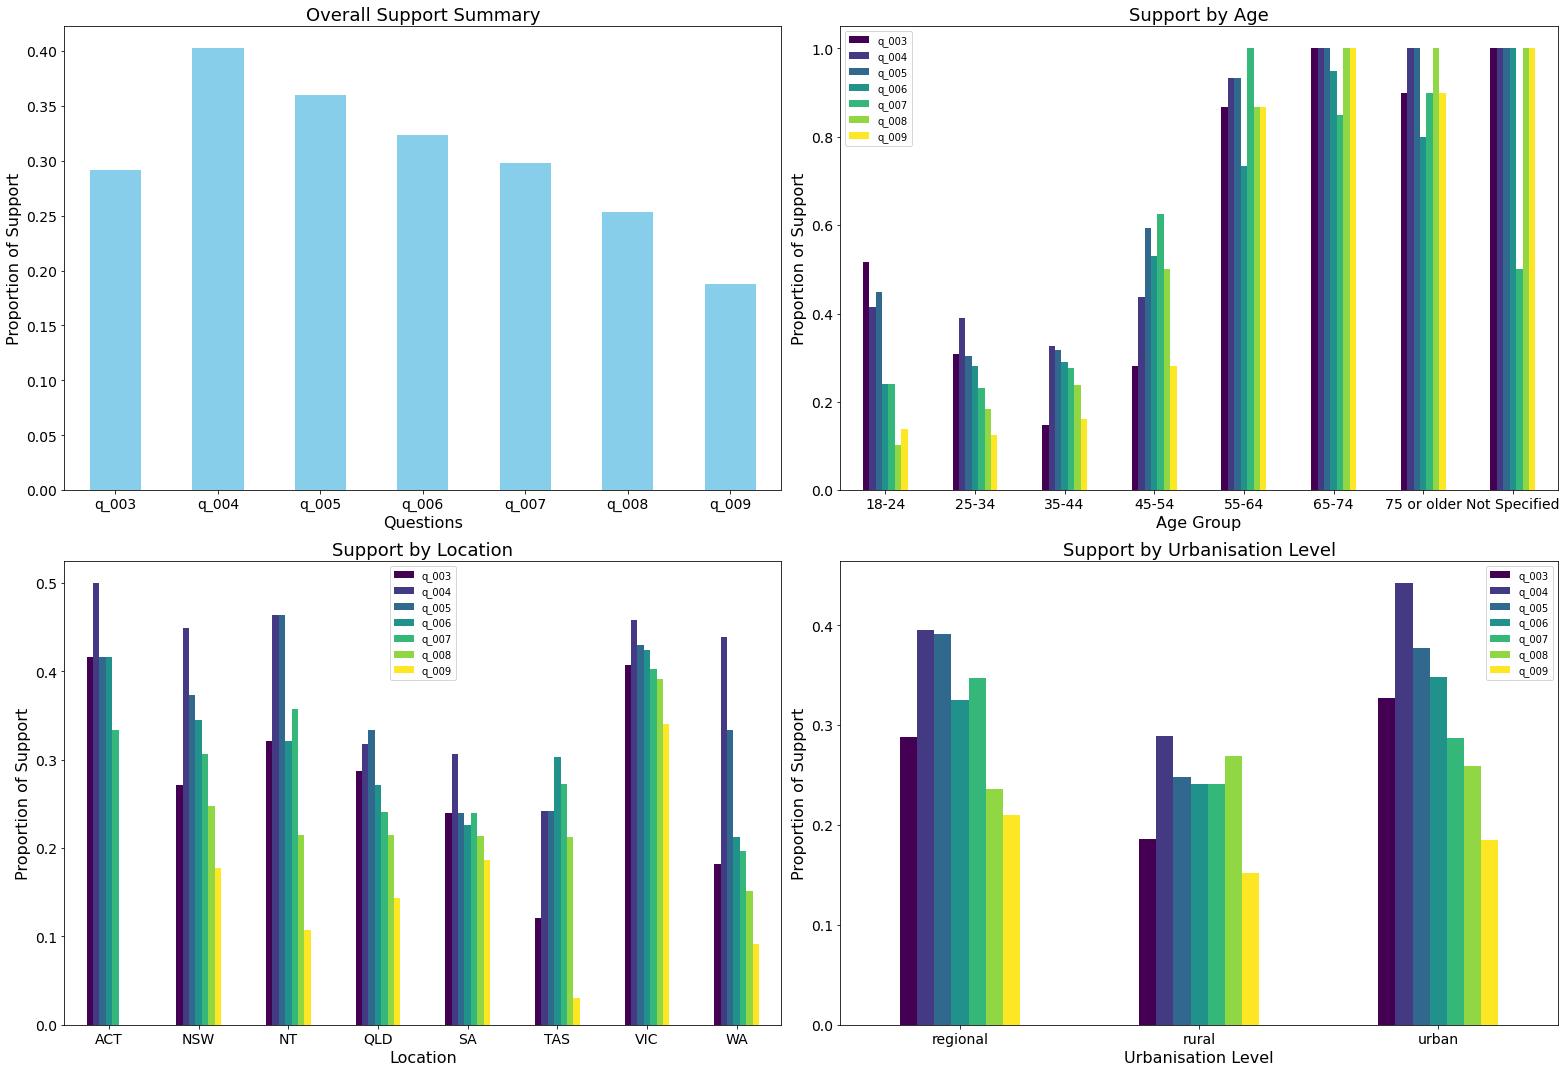

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(22, 15))
plt.xticks(rotation=45)

# Plot for Overall Support Summary
support_summary.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Overall Support Summary', fontsize=18)
axes[0, 0].set_ylabel('Proportion of Support', fontsize=16)
axes[0, 0].set_xlabel('Questions', fontsize=16)
axes[0, 0].tick_params(axis='x', rotation=0, labelsize=14)
axes[0, 0].tick_params(axis='y', rotation=0, labelsize=14)

# Plot for Support by Gender
support_by_age.plot(kind='bar', ax=axes[0, 1], colormap='viridis')
axes[0, 1].set_title('Support by Age', fontsize=18)
axes[0, 1].set_ylabel('Proportion of Support', fontsize=16)
axes[0, 1].set_xlabel('Age Group', fontsize=16)
axes[0, 1].tick_params(axis='x', rotation=0, labelsize=14)
axes[0, 1].tick_params(axis='y', rotation=0, labelsize=14)


# Plot for Support by Location
support_by_location.plot(kind='bar', ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Support by Location', fontsize=18)
axes[1, 0].set_ylabel('Proportion of Support', fontsize=16)
axes[1, 0].set_xlabel('Location', fontsize=16)
axes[1, 0].tick_params(axis='x', rotation=0, labelsize=14)
axes[1, 0].tick_params(axis='y', rotation=0, labelsize=14)


# Plot for Support by Urbanization
support_by_urbanisation.plot(kind='bar', ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Support by Urbanisation Level', fontsize=18)
axes[1, 1].set_ylabel('Proportion of Support', fontsize=16)
axes[1, 1].set_xlabel('Urbanisation Level', fontsize=16)
axes[1, 1].tick_params(axis='x', rotation=0, labelsize=14)
axes[1, 1].tick_params(axis='y', rotation=0, labelsize=14)


plt.tight_layout()
plt.show()